In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

In [34]:
#Setting plot style
sns.set_style('darkgrid')

In [59]:
#Importing dataset (Daily Activity)
df=pd.read_csv('Daily Activity.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
0,1503960366,04-12-2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1624580081,04-12-2016,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,1432,Tuesday
2,1644430081,04-12-2016,10694,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2,51,256,1131,3199,Tuesday
3,1844505072,04-12-2016,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,2030,Tuesday
4,1927972279,04-12-2016,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday


In [60]:
#Changing datatype of 'ActivityDate' from 'object' to 'datetime'
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
df['Date'] = df['ActivityDate'].dt.date

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [62]:
#Importing dataset (Sleep Data)
df2=pd.read_csv('Sleep Data.csv')
df2.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,04-12-2016,1,327,346
1,1927972279,04-12-2016,3,750,775
2,2026352035,04-12-2016,1,503,546
3,3977333714,04-12-2016,1,274,469
4,4020332650,04-12-2016,1,501,541


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  410 non-null    int64 
 1   SleepDay            410 non-null    object
 2   TotalSleepRecords   410 non-null    int64 
 3   TotalMinutesAsleep  410 non-null    int64 
 4   TotalTimeInBed      410 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.1+ KB


In [66]:
 #Renaming 'SleepDay' column to 'ActivityDate' for merging
df2.rename(columns = {'SleepDay':'ActivityDate'}, inplace = True)

In [67]:
#Changing datatype of 'ActivityDate' from 'object' to 'datetime'
df2['ActivityDate']=pd.to_datetime(df2['ActivityDate'])

In [68]:
#Merging 'df' and 'df2'
df_combined = pd.merge(df, df2, on = ['Id', 'ActivityDate'], how = 'inner')
df_combined.head()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   ActivityDate              410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

In [69]:
'''
This code retrieves CSV files from a folder named 'Data' within the current directory.
It reads each CSV file into a Pandas DataFrame and stores them in a dictionary where the
keys are the names of the DataFrames and the values are the DataFrames themselves.
This way, you can access and work with multiple CSV files as separate DataFrames 
'''
import os
import pandas as pd

# Get the current working directory
current_directory = os.getcwd()

# Assuming your CSV files are in a folder named 'csv_data' within the current directory
folder_path = os.path.join(current_directory, 'Data')

dataframes = {}

# Loop through the files in the directory and read only .csv files
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        dataframe_name = os.path.splitext(filename)[0]  # Remove the .csv extension
        dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
        dataframes[dataframe_name] = dataframe

# Now, dataframes will contain all your .csv files as DataFrames with their respective names.
dataframes.keys()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_10776\3799536035.py:22: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
C:\Users\Mukul\AppData\Local\Temp\ipykernel_10776\3799536035.py:22: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
C:\Users\Mukul\AppData\Local\Temp\ipykernel_10776\3799536035.py:22: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
C:\Users\Mukul\AppData\Local\Temp\ipykernel_10776\3799536035.py:22: FutureWarning: The error_bad_lines argument has been 

dict_keys(['dailyActivity_merged', 'dailyCalories_merged', 'dailyIntensities_merged', 'dailySteps_merged', 'heartrate_seconds_merged', 'hourlyCalories_merged', 'hourlyIntensities_merged', 'hourlySteps_merged', 'minuteCaloriesNarrow_merged', 'minuteCaloriesWide_merged', 'minuteIntensitiesNarrow_merged', 'minuteIntensitiesWide_merged', 'minuteMETsNarrow_merged', 'minuteSleep_merged', 'minuteStepsNarrow_merged', 'minuteStepsWide_merged', 'sleepDay_merged', 'weightLogInfo_merged'])

In [37]:
#To print information about dataframe
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        380 non-null    int64         
 1   ActivityDate              380 non-null    datetime64[ns]
 2   TotalSteps                380 non-null    int64         
 3   TotalDistance             380 non-null    float64       
 4   TrackerDistance           380 non-null    float64       
 5   LoggedActivitiesDistance  380 non-null    float64       
 6   VeryActiveDistance        380 non-null    float64       
 7   ModeratelyActiveDistance  380 non-null    float64       
 8   LightActiveDistance       380 non-null    float64       
 9   SedentaryActiveDistance   380 non-null    float64       
 10  VeryActiveMinutes         380 non-null    int64         
 11  FairlyActiveMinutes       380 non-null    int64         
 12  LightlyActiveMinutes  

 - Based on the provided information, it is evident that the 'ActivityDate' column originally had an 'object' data type, so it was converted to 'datetime' for appropriate use.
 - The dataset does not contain any missing values.

In [104]:
#To get a descriptive statistics summary of a given dataframe
df_combined.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,8514.909756,6.012390,6.007366,0.108780,1.446220,0.743902,3.791122,0.000927,25.046341,17.924390,216.541463,712.100000,2389.295122,1.119512,419.173171,458.482927
std,2.060863e+09,4157.375584,3.043946,3.039279,0.505177,1.992591,0.999806,1.720788,0.008685,36.218237,22.418593,86.705299,166.179395,758.435040,0.346636,118.635918,127.455140
min,1.503960e+09,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,5188.750000,3.592500,3.592500,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.250000,1841.000000,1.000000,361.000000,403.750000
50%,4.702922e+09,8913.000000,6.270000,6.270000,0.000000,0.570000,0.420000,3.665000,0.000000,9.000000,11.000000,208.000000,717.000000,2207.000000,1.000000,432.500000,463.000000
75%,6.962181e+09,11370.250000,8.005000,7.950000,0.000000,2.360000,1.037500,4.917500,0.000000,38.000000,26.750000,263.000000,782.750000,2920.000000,1.000000,490.000000,526.000000
max,8.792010e+09,22770.000000,17.540000,17.540000,4.080000,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000


 - The **average daily step count** is **8,514**, and we can gain more insights by examining the data on an hourly basis.
 - Some records indicate a minimum of 0 total steps, which seems implausible as it suggests the participants didn't move at all. This discrepancy may be due to input errors or inconsistencies in device tracking, considering that this data was collected through surveys.

# Correlation

In [72]:
df_combined.corr()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_10776\3145903988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_combined.corr()


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Id,1.000000,0.008363,0.075113,0.073646,0.321007,0.201033,-0.051153,-0.075330,0.033801,0.262918,-0.020039,-0.178682,-0.006461,0.400768,-0.011591,0.082158,0.004339
TotalSteps,0.008363,1.000000,0.981754,0.981882,0.114470,0.680577,0.579193,0.584523,0.047496,0.543694,0.568696,0.417457,-0.130036,0.406301,-0.160958,-0.190344,-0.166232
TotalDistance,0.075113,0.981754,1.000000,0.999555,0.167704,0.707756,0.558520,0.593849,0.060302,0.577577,0.549035,0.384718,-0.126667,0.521216,-0.142386,-0.176936,-0.161177
TrackerDistance,0.073646,0.981882,0.999555,1.000000,0.155382,0.706803,0.557224,0.594945,0.040165,0.577270,0.549189,0.385231,-0.126735,0.522476,-0.142034,-0.177597,-0.161365
LoggedActivitiesDistance,0.321007,0.114470,0.167704,0.155382,1.000000,0.188352,0.027752,0.064231,0.382561,0.335230,-0.022275,-0.084027,0.025198,0.313046,-0.045242,-0.038822,-0.058174
VeryActiveDistance,0.201033,0.680577,0.707756,0.706803,0.188352,1.000000,0.229584,-0.034921,0.052946,0.848889,0.290873,-0.164582,0.007170,0.439302,-0.094602,-0.102781,-0.110379
ModeratelyActiveDistance,-0.051153,0.579193,0.558520,0.557224,0.027752,0.229584,1.000000,0.145856,0.065868,0.187885,0.945192,0.025645,-0.041780,0.071514,-0.062232,-0.244494,-0.098495
LightActiveDistance,-0.075330,0.584523,0.593849,0.594945,0.064231,-0.034921,0.145856,1.000000,0.002875,-0.064268,0.085190,0.852457,-0.209715,0.335522,-0.100241,-0.050131,-0.097961
SedentaryActiveDistance,0.033801,0.047496,0.060302,0.040165,0.382561,0.052946,0.065868,0.002875,1.000000,0.019218,0.027612,0.006118,0.037461,0.028459,-0.036885,-0.038505,-0.054456
VeryActiveMinutes,0.262918,0.543694,0.577577,0.577270,0.335230,0.848889,0.187885,-0.064268,0.019218,1.000000,0.322896,-0.204874,-0.016484,0.611198,-0.119434,-0.088127,-0.109623


# Covariance

In [73]:
df_combined.cov()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_10776\3459452489.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_combined.cov()


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Id,4.247157e+18,7.165556e+10,4.711934e+08,4.612851e+08,3.342007e+08,8.255315e+08,-1.053996e+08,-2.671443e+08,604959.948663,1.962439e+10,-9.258344e+08,-3.192834e+10,-2.212626e+09,6.264129e+11,-8.280584e+06,2.008699e+10,1.139788e+09
TotalSteps,7.165556e+10,1.728377e+07,1.242392e+04,1.240650e+04,2.404117e+02,5.637866e+03,2.407457e+03,4.181656e+03,1.714852,8.186551e+04,5.300391e+04,1.504792e+05,-8.983797e+04,1.281106e+06,-2.319550e+02,-9.388030e+04,-8.808280e+04
TotalDistance,4.711934e+08,1.242392e+04,9.265606e+00,9.247284e+00,2.578829e-01,4.292778e+00,1.699775e+00,3.110574e+00,0.001594,6.367578e+01,3.746671e+01,1.015372e+02,-6.407322e+01,1.203298e+03,-1.502375e-01,-6.389545e+01,-6.253138e+01
TrackerDistance,4.612851e+08,1.240650e+04,9.247284e+00,9.237216e+00,2.385694e-01,4.280425e+00,1.693230e+00,3.111535e+00,0.001060,6.354433e+01,3.741973e+01,1.015168e+02,-6.400971e+01,1.204357e+03,-1.496355e-01,-6.403578e+01,-6.250831e+01
LoggedActivitiesDistance,3.342007e+08,2.404117e+02,2.578829e-01,2.385694e-01,2.552034e-01,1.895971e-01,1.401700e-02,5.583609e-02,0.001678,6.133577e+00,-2.522685e-01,-3.680512e+00,2.115355e+00,1.199415e+02,-7.922357e-03,-2.326708e+00,-3.745669e+00
VeryActiveDistance,8.255315e+08,5.637866e+03,4.292778e+00,4.280425e+00,1.895971e-01,3.970419e+00,4.573788e-01,-1.197388e-01,0.000916,6.126272e+01,1.299360e+01,-2.843445e+01,2.374022e+00,6.638948e+02,-6.534170e-02,-2.429680e+01,-2.803250e+01
ModeratelyActiveDistance,-1.053996e+08,2.407457e+03,1.699775e+00,1.693230e+00,1.401700e-02,4.573788e-01,9.996126e-01,2.509391e-01,0.000572,6.803535e+00,2.118577e+01,2.223139e+00,-6.941687e+00,5.422814e+01,-2.156777e-02,-2.900014e+01,-1.255120e+01
LightActiveDistance,-2.671443e+08,4.181656e+03,3.110574e+00,3.111535e+00,5.583609e-02,-1.197388e-01,2.509391e-01,2.961112e+00,0.000043,-4.005407e+00,3.286418e+00,1.271879e+02,-5.996994e+01,4.378913e+02,-5.979212e-02,-1.023416e+01,-2.148521e+01
SedentaryActiveDistance,6.049599e+05,1.714852e+00,1.594112e-03,1.060149e-03,1.678395e-03,9.162264e-04,5.719244e-04,4.296738e-05,0.000075,6.044964e-03,5.375872e-03,4.606953e-03,5.406357e-02,1.874520e-01,-1.110382e-04,-3.967189e-02,-6.027754e-02
VeryActiveMinutes,1.962439e+10,8.186551e+04,6.367578e+01,6.354433e+01,6.133577e+00,6.126272e+01,6.803535e+00,-4.005407e+00,0.006045,1.311761e+03,2.621796e+02,-6.433699e+02,-9.921247e+01,1.678912e+04,-1.499439e+00,-3.786609e+02,-5.060420e+02


# Use Frequency

In [106]:
#Counting how frequently users use the device
nou=df.Id.value_counts()
nou

1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

# Device Usage Distribution 

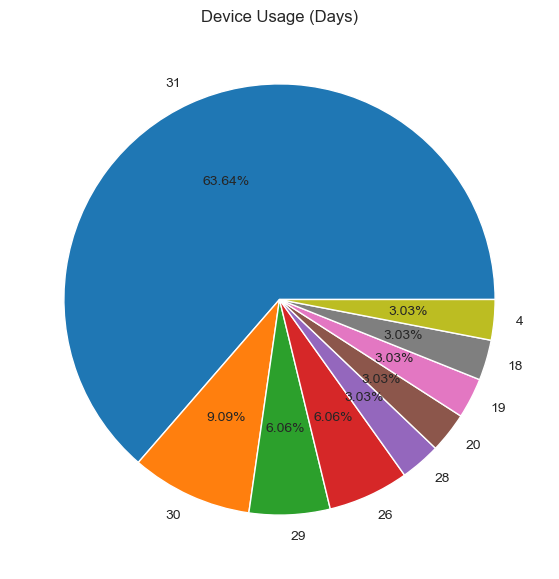

In [75]:
'''
This code generates a pie chart visualizing the distribution of device usage across 
different days. It first counts the occurrences of each unique value in the 'nou' series,
which presumably represents the days of device usage. Then, it creates a pie chart using 
matplotlib, where each slice of the pie represents the percentage of device usage on a 
specific day. The labels on the pie chart correspond to the unique days, and the autopct 
parameter displays the percentage on each slice.
'''
#Piechart for device usage in days
plot = nou.value_counts()
plot.index.astype("category")
fig = plt.figure(figsize =(10, 7))
plt.pie(plot, labels=plot.index, autopct='%1.2f%%')
plt.title("Device Usage (Days)")
plt.show()

**On the basis of above results, we can interpret that maximum number of users uses device for whole month on daily basis whereas very few user are not regular, more than 65% of the users uses the device daily.**

According to smart device, each active minute equals 10 minutes or more of continuous moderate-to-intense activity. *LightlyActiveMinutes* represent lightly intensity activities such as daily walk. *FairlyActiveMinutes* represents moderate-intensity activities. *VeryActiveMinutes* indicate vigorous-intensity exercise. Therefore, we can assume that the sum of *FairlyActiveMinutes* and *VeryActiveMinutes* represents total exercise time of users, represented by *"TotalExerciseMinutes"*.

In [108]:
# Add TotalExerciseMinutes and TotalActiveMinutes
df_combined['TotalExerciseMinutes'] = df_combined['VeryActiveMinutes'] + df_combined['FairlyActiveMinutes']
df_combined['TotalActiveMinutes'] = df_combined['TotalExerciseMinutes'] + df_combined['LightlyActiveMinutes']
df_combined.sample(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories,Day,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SedentaryLevel,TotalExerciseMinutes,TotalActiveMinutes
303,8378563200,2016-05-03,8712,6.91,6.91,2.25,1.34,1.06,4.50,0.0,...,822,3784,Tuesday,2016-05-03,1,405,429,high,91,286
162,8053475328,2016-04-23,22359,17.19,17.19,0.00,12.54,0.63,4.02,0.0,...,741,3554,Saturday,2016-04-23,1,331,337,high,139,362
398,5577150313,2016-05-11,4038,3.04,3.04,0.00,1.83,0.30,0.89,0.0,...,257,1665,Wednesday,2016-05-11,1,431,476,low,60,123
90,6117666160,2016-04-18,5153,3.91,3.91,0.00,0.00,0.00,3.89,0.0,...,759,2018,Monday,2016-04-18,2,493,510,high,0,241
103,6117666160,2016-04-19,11135,8.41,8.41,0.00,0.00,0.00,8.41,0.0,...,425,2606,Tuesday,2016-04-19,1,465,492,high,0,480


In [109]:
# Summary by Activity
df_combined[['TotalSteps',
         'Calories',
         'TotalExerciseMinutes',
         'TotalActiveMinutes',
         'VeryActiveMinutes',
         'FairlyActiveMinutes',
         'LightlyActiveMinutes',
         'SedentaryMinutes']].describe()

,TotalSteps,Calories,TotalExerciseMinutes,TotalActiveMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,8514.909756,2389.295122,42.970732,259.512195,25.046341,17.924390,216.541463,712.100000
std,4157.375584,758.435040,48.360243,92.173330,36.218237,22.418593,86.705299,166.179395
min,17.000000,257.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5188.750000,1841.000000,0.000000,206.500000,0.000000,0.000000,158.000000,631.250000
50%,8913.000000,2207.000000,30.000000,263.500000,9.000000,11.000000,208.000000,717.000000
75%,11370.250000,2920.000000,67.750000,315.500000,38.000000,26.750000,263.000000,782.750000
max,22770.000000,4900.000000,275.000000,540.000000,210.000000,143.000000,518.000000,1265.000000


 - Fitbit users, on **average**, take **8514 daily steps**, falling short of the 10,000-step target.
 - Out of the all the recorded, only **43 minutes** are **spent on exercise**, indicating that most activity is non-exercise related.

In [110]:
#Extracting 'Day of Week' into specific column from given 'ActivityDate'
df['Day'] = df['ActivityDate'].dt.strftime('%A')

In [114]:
# On what days do users exercise most?
DaySummary = df_combined.groupby('Day')[[       'TotalActiveMinutes',
                                                'TotalExerciseMinutes',
                                                'VeryActiveMinutes',
                                                'FairlyActiveMinutes',
                                                'LightlyActiveMinutes',
                                                'SedentaryMinutes']].mean().reset_index()
DaySummary

,Day,TotalActiveMinutes,TotalExerciseMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,Friday,258.421053,35.736842,21.157895,14.578947,222.684211,743.087719
1,Monday,272.173913,49.804348,30.717391,19.086957,222.369565,718.413043
2,Saturday,297.052632,50.280702,27.561404,22.719298,246.771930,680.438596
3,Sunday,238.945455,38.909091,22.145455,16.763636,200.036364,687.636364
4,Thursday,241.656250,38.718750,22.859375,15.859375,202.937500,698.375000
5,Tuesday,267.246154,50.661538,30.615385,20.046154,216.584615,740.046154
6,Wednesday,246.045455,38.075758,21.333333,16.742424,207.969697,714.454545


 - **Saturday** has **highest Active Time**, next comes Monday and Tuesday.
 - **Tuesday** has **highest Exercise Time**, next comes Saturday and Monday

# Daily Active Minutes Per Categories

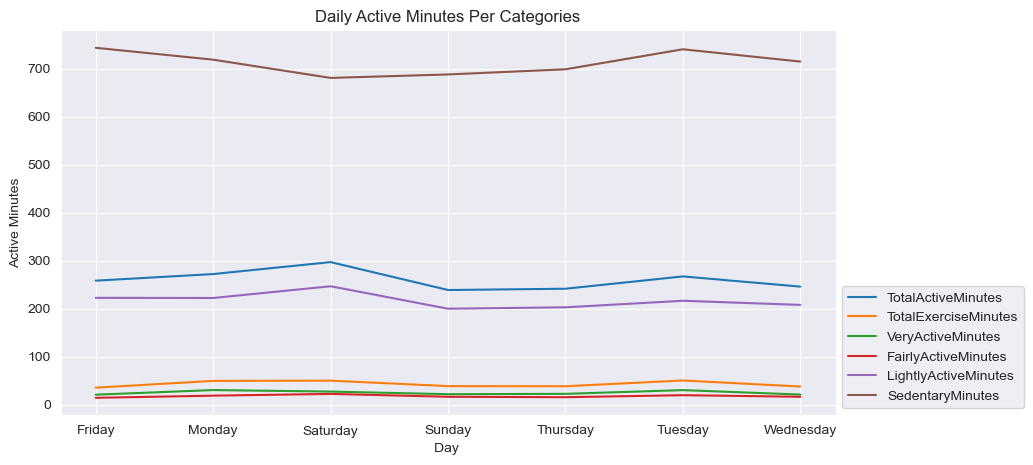

In [115]:
'''
This code is creating a line graph to visualize daily active minutes categorized into
various activity levels. It plots data from the 'DaySummary' DataFrame for different 
types of activity minutes, such as TotalActiveMinutes, TotalExerciseMinutes,
VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, and SedentaryMinutes,
on the y-axis. The x-axis represents days of the week. The code sets labels, titles,
and a legend to enhance the graph's readability and comprehension. This graph provides
an overview of how different activity levels vary throughout the week.
'''
# Plot it on a graph
ycols = ['TotalActiveMinutes',
        'TotalExerciseMinutes',
        'VeryActiveMinutes',
        'FairlyActiveMinutes',
        'LightlyActiveMinutes',
        'SedentaryMinutes']
plt.figure(figsize=(10,5))
plt.plot(DaySummary['Day'],
        DaySummary[ycols], label=ycols)
plt.xlabel('Day ')
plt.ylabel('Active Minutes')
plt.title('Daily Active Minutes Per Categories')
plt.legend(bbox_to_anchor=(1,0), loc='lower left')

 - **Saturdays** stand out as the **most active day** with the **lowest Sedentary Time**.
 - **Fridays**, on the other hand, record the **highest Sedentary Time**.
 - It's worth noting that **despite having the highest Exercise time, Tuesdays also rank second in terms of Sedentary Time**.

In [119]:
#Printing correlation matrix
correlation_matrix = df_combined[['TotalSteps',
                              'TotalMinutesAsleep',
                              'TotalActiveMinutes',
                              'TotalExerciseMinutes',
                              'VeryActiveMinutes',
                              'FairlyActiveMinutes',
                              'LightlyActiveMinutes',
                              'SedentaryMinutes',
                              'Calories']].corr()
correlation_matrix

,TotalSteps,TotalMinutesAsleep,TotalActiveMinutes,TotalExerciseMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.000000,-0.190344,0.744648,0.670820,0.543694,0.568696,0.417457,-0.130036,0.406301
TotalMinutesAsleep,-0.190344,1.000000,-0.069294,-0.181527,-0.088127,-0.249208,0.027583,-0.601073,-0.031699
TotalActiveMinutes,0.744648,-0.069294,1.000000,0.372048,0.278751,0.352228,0.855553,-0.262689,0.389983
TotalExerciseMinutes,0.670820,-0.181527,0.372048,1.000000,0.898613,0.705400,-0.162243,-0.031330,0.539326
VeryActiveMinutes,0.543694,-0.088127,0.278751,0.898613,1.000000,0.322896,-0.204874,-0.016484,0.611198
FairlyActiveMinutes,0.568696,-0.249208,0.352228,0.705400,0.322896,1.000000,-0.018999,-0.040954,0.175988
LightlyActiveMinutes,0.417457,0.027583,0.855553,-0.162243,-0.204874,-0.018999,1.000000,-0.261781,0.113766
SedentaryMinutes,-0.130036,-0.601073,-0.262689,-0.031330,-0.016484,-0.040954,-0.261781,1.000000,0.098656
Calories,0.406301,-0.031699,0.389983,0.539326,0.611198,0.175988,0.113766,0.098656,1.000000


 - **TotalMinutesAsleep** exhibits a **mild negative correlation with both exercise time and overall activity time**.
 - Notably, **Calories display a relatively strong positive correlation with ActiveMinutes** metrics, showing coefficients of 0.41 for TotalSteps, 0.39 for TotalActiveMinutes, 0.54 for TotalExerciseMinutes, and 0.61 for VeryActiveMinutes. **This indicates that physical exercises, particularly those of vigorous intensity, play a significant role in calorie expenditure**.

# Correlation Heatmap

Text(0.5, 1.0, 'Correlation heatmap: Total Minutes Asleep vs. Active Time')

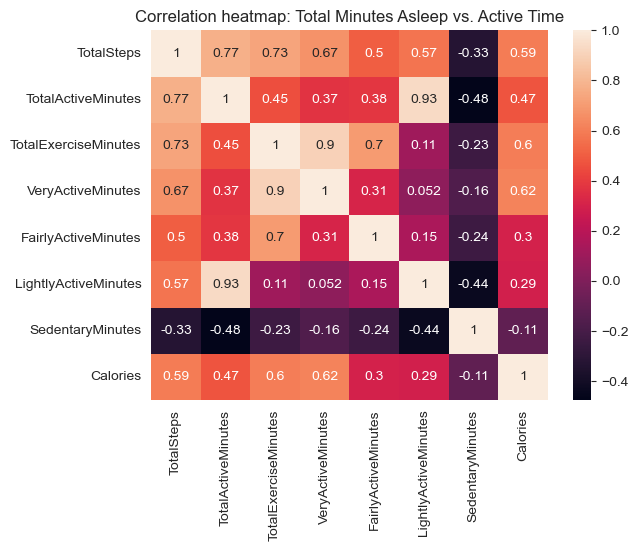

In [83]:
# Plotting sleep correlation heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation heatmap: Total Minutes Asleep vs. Active Time')

# Relationship Between Sedentary Minutes and Total Sleep Time

Regression Wquation: TotalMinutesAsleep = -0.429108 * SedentaryMinutes + 724.740787
R-Squared = 0.3612889192653306


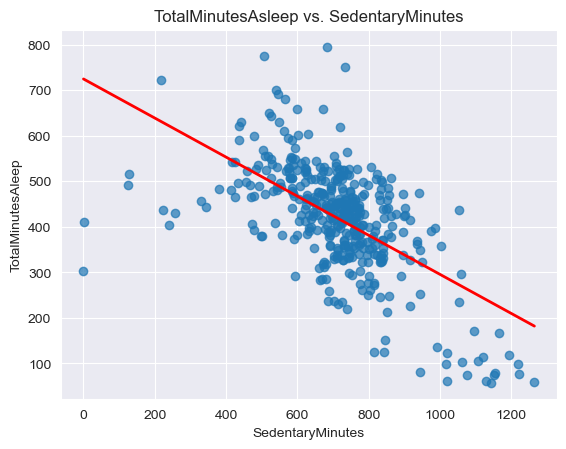

In [121]:
'''
This code creates a scatter plot to visualize the relationship between two variables,
'SedentaryMinutes' and 'TotalMinutesAsleep.' It sets 'SedentaryMinutes' on the x-axis
and 'TotalMinutesAsleep' on the y-axis. The scatter plot includes a trendline (a linear regression line)
in red to represent the linear relationship between the two variables. The code also calculates and prints
the regression equation, which describes how 'TotalMinutesAsleep' changes concerning 'SedentaryMinutes.'

Furthermore, it calculates the R-squared value, a measure of how well the linear regression line fits 
the data. R-squared values range from 0 to 1, with higher values indicating a better fit. This analysis
helps assess the strength of the relationship between the two variables and whether 'SedentaryMinutes'
can predict 'TotalMinutesAsleep.'
'''
# Sleep vs. Sedentary Minutes
plt.scatter(df_combined['SedentaryMinutes'], df_combined['TotalMinutesAsleep'], alpha = 0.7)
plt.ylabel('TotalMinutesAleep')
plt.xlabel('SedentaryMinutes')
plt.title('TotalMinutesAsleep vs. SedentaryMinutes')

# Add a trendline
slope, intercept = np.polyfit(df_combined['SedentaryMinutes'],df_combined['TotalMinutesAsleep'],1)
x_fit = np.array([min(df_combined['SedentaryMinutes']),
                 max(df_combined['SedentaryMinutes'])])
y_fit = slope*x_fit + intercept
plt.plot(x_fit, y_fit, color = 'red', linewidth=2)
print(f'Regression Wquation: TotalMinutesAsleep = {slope:2f} * SedentaryMinutes + {intercept:2f}')

# Calculate R-squared
MeanMinutesAsleep = df_combined['TotalMinutesAsleep'].mean()
residual = df_combined['TotalMinutesAsleep'] - (slope * df_combined['SedentaryMinutes'] + intercept)
SS_res = np.sum(residual**2)
SS_tot = np.sum((df_combined['TotalMinutesAsleep'] - MeanMinutesAsleep)**2)
R_squared = 1 - (SS_res/SS_tot)
print('R-Squared =', R_squared)

 - The correlation analysis reveals a **moderate negative relationship between Sedentary time and TotalTimeAsleep (-0.6)**. While there is a linear association between SedentaryMinutes and TotalMinutesAsleep, the regression model's low R-squared value (only explaining 36% of the variance in TotalMinutesAsleep per 1-unit change in SedentaryMinutes) indicates that it's not a strong predictor.  

  
 - It's essential to emphasize that correlation does not imply causation. Additionally, the relatively small sample size of 33 participants limits the accuracy of the prediction model, making it unsuitable for predicting sleep quality improvements as Sedentary time decreases. At this stage, the conclusion is that reducing sedentary behavior may help enhance sleep quality.



 - To further support this finding, a test can be conducted to determine whether individuals with lower Sedentary time experience better sleep quality. Based on the definition from VeryWellHealth, a sedentary lifestyle involves spending four to six waking hours sitting or lying down. Therefore, it's assumed that individuals with more than 6 hours (360 minutes) of SedentaryMinutes fall into the high SedentaryLevel group, while those with 6 hours or less are classified as the low SedentaryLevel group.

In [122]:
# Add SedentaryLevel colum
df_combined['SedentaryLevel'] = df_combined['SedentaryMinutes'].apply(lambda x: 'high' if x > 360 else 'low')
df_combined.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories,Day,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SedentaryLevel,TotalExerciseMinutes,TotalActiveMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,728,1985,Tuesday,2016-04-12,1,327,346,high,38,366
1,1927972279,2016-04-12,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,...,734,2220,Tuesday,2016-04-12,3,750,775,high,0,55
2,2026352035,2016-04-12,4414,2.74,2.74,0.0,0.19,0.35,2.20,0.0,...,706,1459,Tuesday,2016-04-12,1,503,546,high,11,192
3,3977333714,2016-04-12,8856,5.98,5.98,0.0,3.06,0.91,2.01,0.0,...,777,1450,Tuesday,2016-04-12,1,274,469,high,63,194
4,4020332650,2016-04-12,8539,6.12,6.12,0.0,0.15,0.24,5.68,0.0,...,712,3654,Tuesday,2016-04-12,1,501,541,high,19,350


# Sedentary Minutes vs Total Sleep Time by Sendentary Level

Text(0.5, 1.0, 'SedentaryMinutes vs. TotalMinutesAsleep by SedentaryLevel')

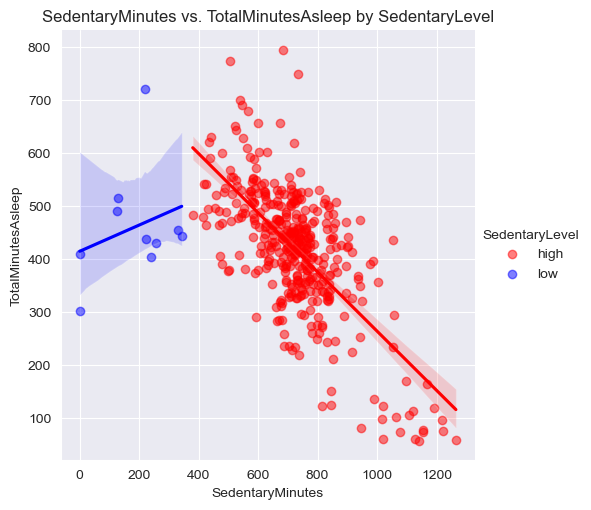

In [123]:
'''
This code generates a scatter plot with trendlines to visualize the relationship
between SedentaryMinutes (the time spent in a sedentary state) and TotalMinutesAsleep
(the total sleep duration) categorized by SedentaryLevel. It uses seaborn's lmplot
function to create separate scatter points for low and high SedentaryLevel, distinguished
by blue and red colors, respectively. The trendlines show the linear relationships for each
SedentaryLevel group. This visualization helps assess how sleep duration varies with sedentary behavior levels.
'''
# Plot a scatter plot with trendlines for each Sedentary Level
color_map = {'low':'blue', 'high':'red'}
sns.lmplot(data=df_combined, x='SedentaryMinutes', y='TotalMinutesAsleep', hue='SedentaryLevel', palette=color_map, scatter_kws={'alpha':0.5})
plt.title('SedentaryMinutes vs. TotalMinutesAsleep by SedentaryLevel')

- The chart makes it evident that individuals with **high sedentary levels experience a reduction in TotalMinutesAsleep as their SedentaryMinutes increase**, aligning with the regression equation's expectations.
 - Surprisingly, individuals with **low sedentary levels also show an increase in TotalMinutesAsleep as SedentaryMinutes rise**. However, this observation may be influenced by population bias, as there are only a few cases in this category, including two with 0 SedentaryMinutes, which is an unrealistic scenario.

In [124]:
'''
On the basis of this code, we are assigning activity level to each respective 
rows accordingly by mapping 'Id' with the 'nou'(Usage) and assigning activity
level to each respective row.
'''
#Assigning user activity respectively
df["activity"]=df["Id"].map(nou)

#defining condition to check
extra_cond = np.logical_and(df["activity"] < 20, df["activity"] > 15)
conditions = [(df["activity"] >= 20), extra_cond, (df["activity"] <= 15)]

#applying condition to each respective row
values = ["Strong activity","Medium activity", "Weak activity"]
df["activity"] = np.select(conditions, values)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,Date,TotalExerciseMinutes,TotalActiveMinutes,activity
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2016-04-12,38,366,Strong activity
1,1624580081,2016-04-12,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,1432,Tuesday,2016-04-12,0,146,Strong activity
2,1644430081,2016-04-12,10694,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2,51,256,1131,3199,Tuesday,2016-04-12,53,309,Strong activity
3,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,2030,Tuesday,2016-04-12,0,339,Strong activity
4,1927972279,2016-04-12,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday,2016-04-12,0,55,Strong activity


In [125]:
'''
This code first converts the "ActivityDate" column in a DataFrame called 'df' to 
a datetime format using pd.to_datetime(). Then, it groups the DataFrame by the "Id"
column and calculates the mean values for each group. The result is stored in a 
new DataFrame called 'id_table,' which contains the mean values of the columns 
grouped by the "Id" values.
'''
#Grouping same 'Id' by mean values of colummn values
df["ActivityDate"]=pd.to_datetime(df["ActivityDate"])
id_table = df.groupby(["Id"]).mean()
id_table.head()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_10776\936496836.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  id_table = df.groupby(["Id"]).mean()


,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalExerciseMinutes,TotalActiveMinutes
Id,,,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355,57.870968,277.806452
1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839,14.483871,167.967742
1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000,30.933333,209.400000
1844505072,2580.064516,1.706129,1.706129,0.0,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871,1.419355,116.870968
1927972279,916.129032,0.634516,0.634516,0.0,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452,2.096774,40.677419


In [126]:
#Viewing category of activities
plot=df["activity"].value_counts()
plot.index.astype("category")

CategoricalIndex(['Strong activity', 'Medium activity', 'Weak activity'], categories=['Medium activity', 'Strong activity', 'Weak activity'], ordered=False, dtype='category')

# Usage Activity Distribution

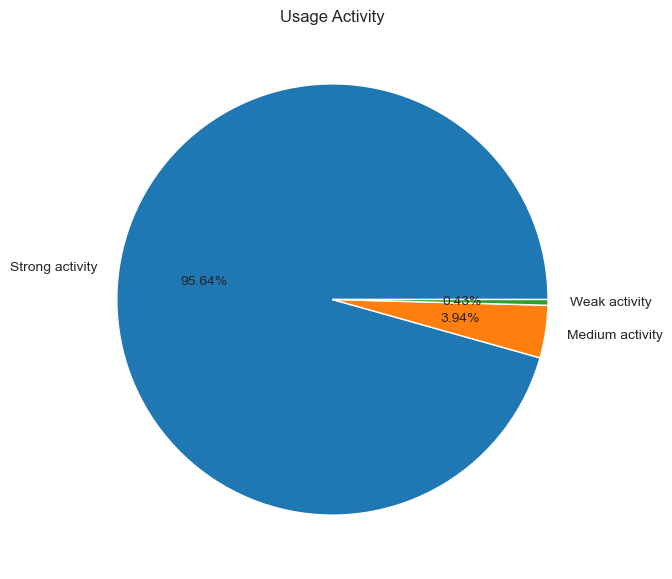

In [127]:
#Plotting piechart for usgae activity
fig = plt.figure(figsize =(10, 7))
plt.pie(plot, labels=plot.index, autopct='%1.2f%%')
plt.title("Usage Activity")
plt.show()

On the basis of piechart, we can analyze that **majority (93.38%) of the users do strong activity**, implies their device tracks there activity on daily basis, and **rest (6.17%) do medium activity and restover do weak activity**, and to encourage the the users which have weak and medium activity by active marketing campaigns.

# Device Usage Frequency

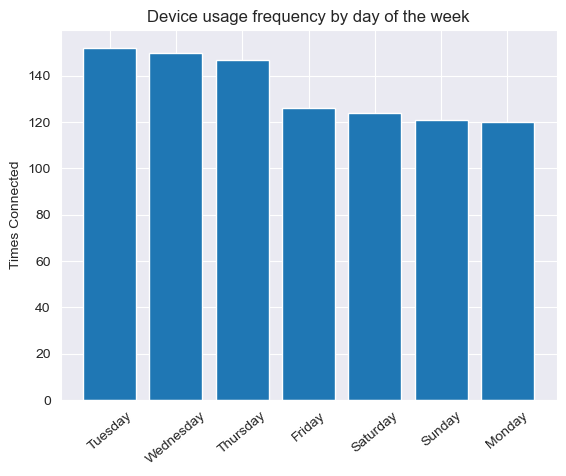

In [128]:
#Histogram for device usage frequency in a week
plot = df["Day"].value_counts()
plt.bar(plot.index, plot.values )
plt.ylim(ymin=0)
plt.xticks(rotation=40)
plt.title("Device usage frequency by day of the week")
plt.ylabel("Times Connected")
plt.show()

On the basis of plotted histgram, it can be seen that users tend to connect the device mostly on **Tuesdays, Wednesdays and Thursdays.**

In [93]:
#Reading rest of all .csv files
weight=pd.read_csv("Weight Data.csv")
w = weight["Id"].value_counts().size
calories=pd.read_csv("Hourly Calories.csv")
c = calories["Id"].value_counts().size
heart=pd.read_csv("Heartrate Data.csv")
h = heart["Id"].value_counts().size
steps=pd.read_csv("Hourly Steps.csv")
s = steps["Id"].value_counts().size
sleep=pd.read_csv("Sleep Data.csv")
sl = sleep["Id"].value_counts().size

In [129]:
'''
This code analyzes user engagement with different features, calculates the number of users for 
each feature, computes the percentage of users, and ranks the features by popularity.
It helps identify which features are most commonly used by the user base.
'''
#Creating a dataframe
df1=pd.DataFrame()
df1["Feature"]=["Weight","Calories", "Heartrate", "Steps", "Sleep"]
df1["Number of Users"]=[w,c,h,s,sl]
df1["Percent"]=round(df1["Number of Users"]/33*100,0).astype(int)
df1.sort_values("Percent", ascending=False, inplace=True, ignore_index=True)
df1

,Feature,Number of Users,Percent
0,Calories,33,100
1,Steps,33,100
2,Sleep,24,73
3,Weight,8,24
4,Heartrate,7,21


# Features Usage

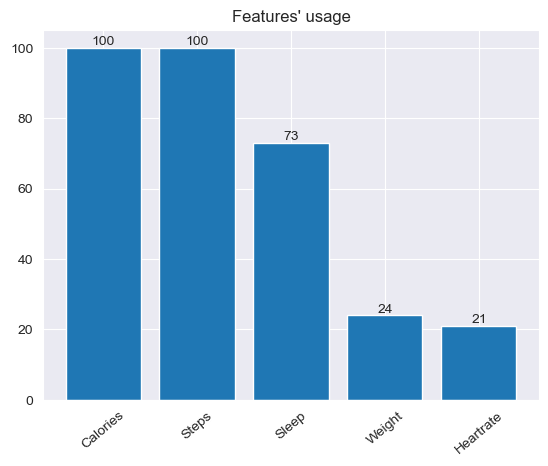

In [130]:
'''
This visualization is likely used to depict the usage percentages of different features.
'''
#Plotting a histogram
plt.bar(df1["Feature"], df1["Percent"] )
plt.ylim(ymin=0)
plt.xticks(rotation=40)
plt.title("Features' usage")
for i in range(len(df1["Feature"])):
    plt.text(i, df1["Percent"][i], df1["Percent"][i], ha="center", va="bottom")
plt.show()

On the basis of histogram, we can visualise that maximum of features like **calories, steps count are the main point for users to use the device**, probably these feauters are on by default. Features like **sleep log, heartrate monitor and weight log require additional input of information from users, therefore they are used less.** On the basis of this interpretation the company can enhance their value proposition in terms of most used features and to promote these features among users

Steps Count is a default feature, used by every user every day therefore it is the right data sample for the task to calculate device usage by hour.

In [134]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [132]:
'''
This code groups the "steps" DataFrame by the "ActivityHour" column and calculates 
the mean value for each group. It then rounds the "StepTotal" column to the nearest
integer and drops the "Id" column. This likely represents aggregating and summarizing
data for each hour, possibly for further visualization or analysis.
'''
#Calculating StepTotal
plot = steps.groupby("ActivityHour").mean()
plot["StepTotal"] = round(plot["StepTotal"],0).astype(int)
plot = plot.drop(columns="Id")
plot.head()

,StepTotal
ActivityHour,
00:00:00,42
01:00:00,23
02:00:00,17
03:00:00,6
04:00:00,13


# Average Number of Steps Throughout the Day

<Axes: title={'center': 'Average Number of Steps (During the Day)'}, xlabel='Activity Hour', ylabel='Average Steps'>

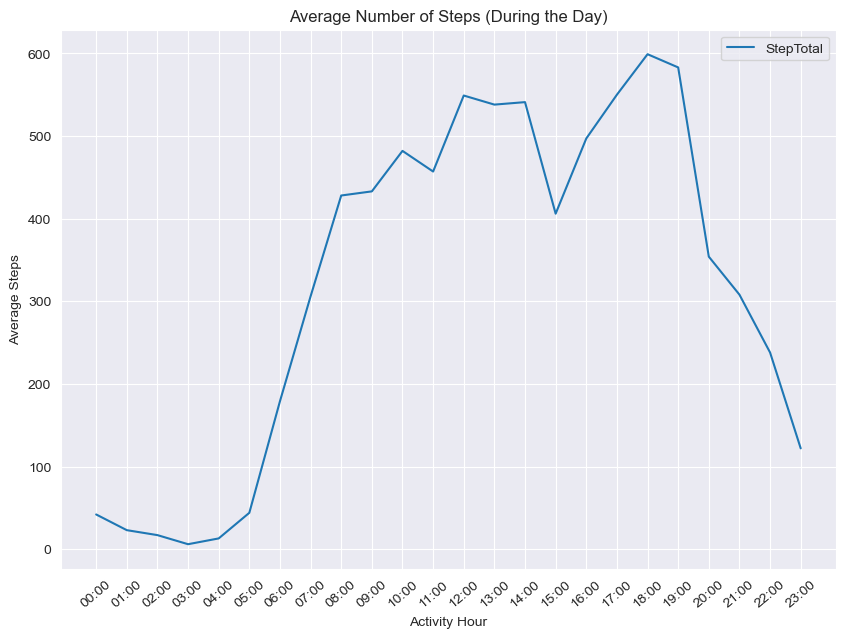

In [133]:
#Plotting linechart
plot.plot(figsize=(10,7),rot=40, xticks=plot.index, grid=True, title="Average Number of Steps (During the Day)",
             xlabel="Activity Hour",
             ylabel="Average Steps", legend=True)

On the basis of above linechart, it can be interpreted that majority of users are **mostly active in 8:00H - 20:00H interval**,
starting from morning walk of 5:00H and **peak on 18:00H signifies that device tracks majority of activity during evening walk.**